# Heart Failure Prediction
The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data) and followed the same principles learn from before to conduct this exercise.

We will be trying to predict the cause of heart failure based on the given data.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Checking for null / empty rows

In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Data Exploration / Analysis
In this section we will be looking at which columns correlate highly to heart failure / death.

The highest relation to the cause of death is :
- time
- serum_creatinine (Level of serum creatinine in the blood (mg/dL)) 
- ejection_fraction (Percentage of blood leaving the heart at each contraction)

<Axes: >

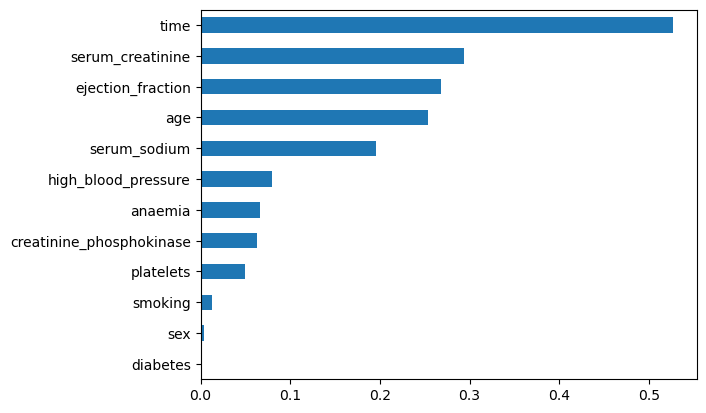

In [34]:
corr_arr = []
name_arr = []


for col in range(len(data.columns)):
    if data.columns[col] == "DEATH_EVENT":
        continue

    name_arr.append(data.columns[col])

    corr = data.corr()["DEATH_EVENT"][col]
    if corr < 0: corr *= -1
    corr_arr.append(corr)

pd.Series(corr_arr, name_arr).sort_values().plot(kind="barh")

<Axes: >

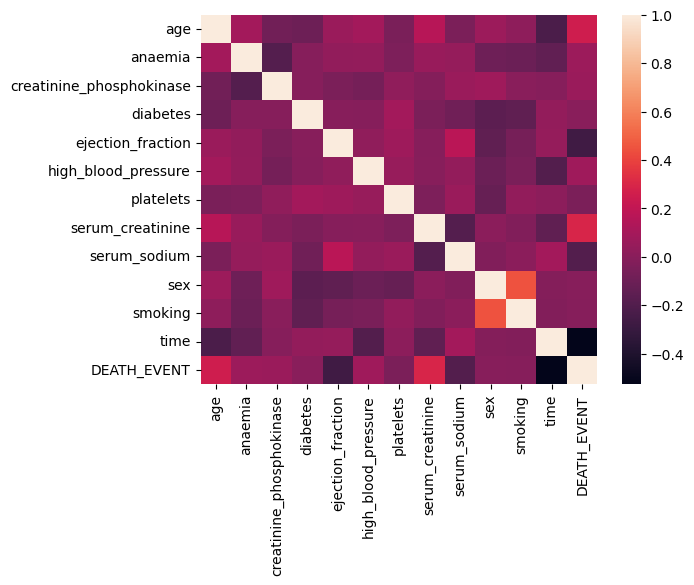

In [35]:
sns.heatmap(data.corr())

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


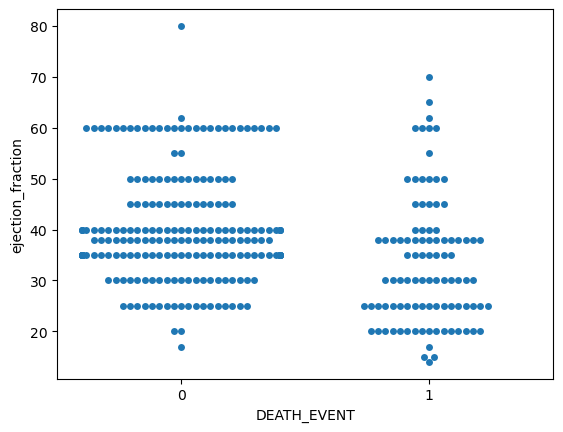

In [46]:
sns.swarmplot(x="DEATH_EVENT", y="ejection_fraction", data=data) 

e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


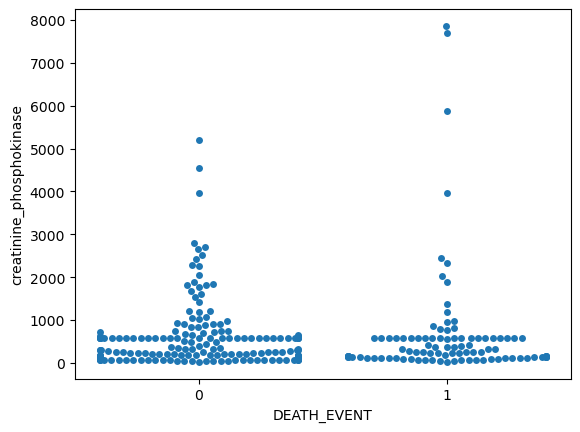

In [54]:
sns.swarmplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=data) 

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

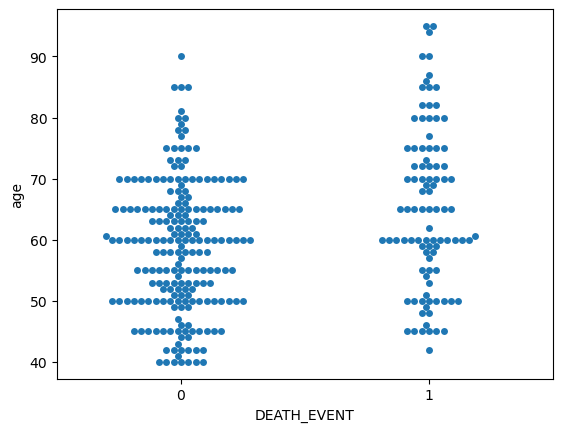

In [48]:
sns.swarmplot(x="DEATH_EVENT", y="age", data=data) 

## Splitting the data to training and scaling the data

In [9]:
X = data.drop(['DEATH_EVENT'], axis=1)
Y = data['DEATH_EVENT']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Machine Learning Models

In [12]:
model_scores = {}
model_predictions = {}

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import accuracy_score

lg_prediction = lg.predict(X_train)
model_predictions["Logistic Regression"] = lg_prediction

lg_acc = accuracy_score(Y_train, lg_prediction)
model_scores["Logistic Regression"] = lg_acc

print(str(round(lg_acc * 10000) / 100) + "% Accuracy")

84.94% Accuracy


### Random Forest Classification

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [16]:
from sklearn.metrics import accuracy_score

forest_prediction = forest.predict(X_train)
model_predictions["Random Forest Regression"] = forest_prediction

forest_acc = accuracy_score(Y_train, forest_prediction)
model_scores["Random Forest Regression"] = forest_acc

print(str(round(forest_acc * 10000) / 100) + "% Accuracy")

100.0% Accuracy


## Comparison of Models

First let us compare the Scores. Random Forest Regression has the higher accuracy score.

In [17]:
pd.DataFrame.from_dict(model_scores, orient="index", columns=["Score"])

,Score
Logistic Regression,0.849372
Random Forest Regression,1.000000


Let us compare the values from the models

In [18]:
model_predictions["Base"] = Y_train
pd.DataFrame(model_predictions)

,Logistic Regression,Random Forest Regression,Base
77,0,0,0
58,1,1,1
14,1,0,0
146,0,0,0
181,0,1,1
...,...,...,...
277,0,0,0
256,0,0,0
131,1,0,0
249,0,0,0
